# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, 
                  centers=4, 
                  n_features=2, 
                  cluster_std=[1, 1.5, 2, 2], 
                  random_state=7
)

df_blobs = pd.DataFrame(
    {
        'x1': x[:,0],
        'x2': x[:,1],
        'y': y
    }
)

In [3]:
def plot_2d_clusters(x, y, ax):
    
    y_uniques = pd.Series(y).unique()
    
    for y_unique_item in y_uniques:
        x[
            y == y_unique_item
        ].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker=f'${y_unique_item}$',
            s=60,
            color='k',
            ax=ax,
            alpha=0.7
        )

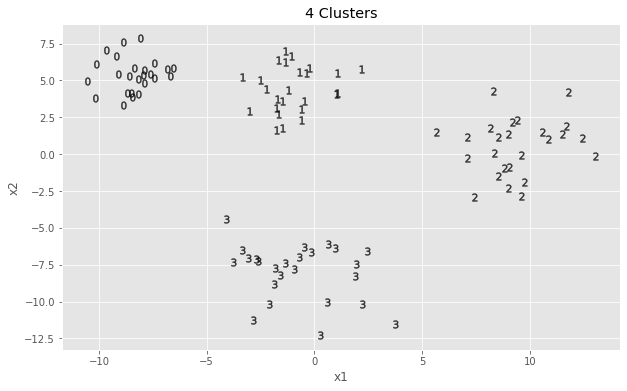

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharey=False)

x, y = df_blobs[['x1', 'x2']], df_blobs['y']
plot_2d_clusters(x, y, ax)

# Clustering with K-means

In [5]:
x, y = df_blobs[['x1', 'x2']], df_blobs['y']

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=7)
y_pred = km.fit_predict(x)

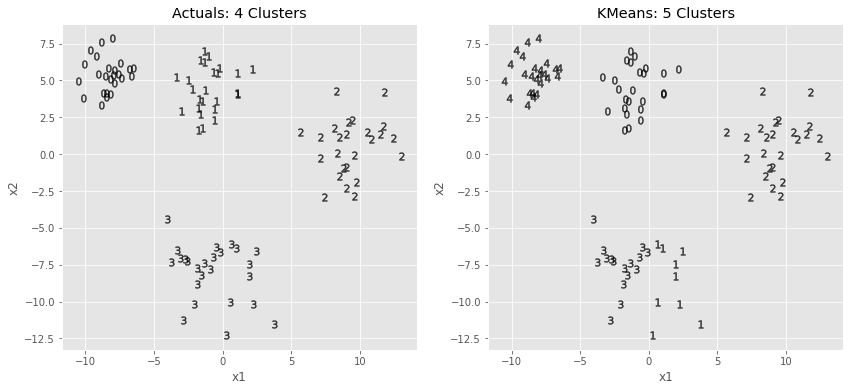

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

plot_2d_clusters(x, y, axs[0])
plot_2d_clusters(x, y_pred, axs[1])

axs[0].set_title(f'Actuals: {axs[0].get_title()}')
axs[1].set_title(f'KMeans: {axs[1].get_title()}')

print('')


# What is the right number of clusters?

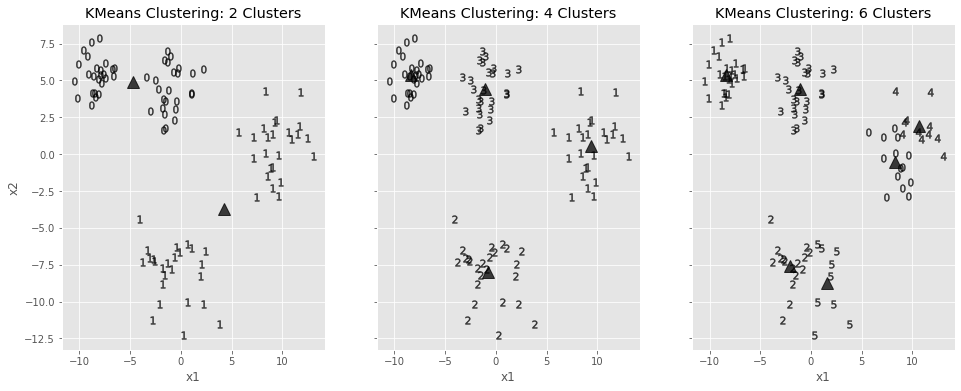

In [8]:
from sklearn.cluster import KMeans

n_clusters_options = [2, 4, 6]

fig, axs = plt.subplots(1, len(n_clusters_options), figsize=(16, 6), sharex=True, sharey=True)

for i, n_clusters in enumerate(n_clusters_options):
    
    x, y = df_blobs[['x1', 'x2']], df_blobs['y']

    kmeans = KMeans(n_clusters=n_clusters, random_state=7)
    y_pred = kmeans.fit_predict(x)
    
    plot_2d_clusters(x, y_pred, axs[i])
    
    axs[i].plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'k^', ms=12, alpha=0.75)
    axs[i].set_title(f'KMeans Clustering: {axs[i].get_title()}')

## Silhouette Score

Advantages:

- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

Drawbacks:

- The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [9]:
from sklearn.metrics import silhouette_score

n_clusters_options = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []

for i, n_clusters in enumerate(n_clusters_options):

    x, y = df_blobs[['x1', 'x2']], df_blobs['y']
    kmeans = KMeans(n_clusters=n_clusters, random_state=7)
    y_pred = kmeans.fit_predict(x)

    silhouette_scores.append(silhouette_score(x, y_pred))

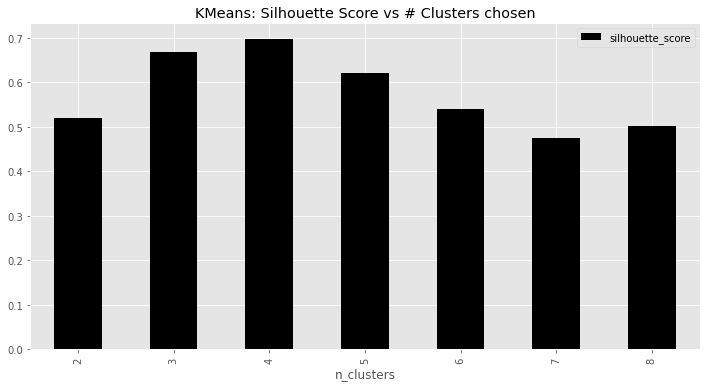

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharey=False)

pd.DataFrame(
    {
        'n_clusters': n_clusters_options,
        'silhouette_score': silhouette_scores,
    }
).set_index('n_clusters').plot(
    title='KMeans: Silhouette Score vs # Clusters chosen',
    kind='bar',
    color='k',
    ax=ax
)

## Clusters Initial Centroids and Conversion

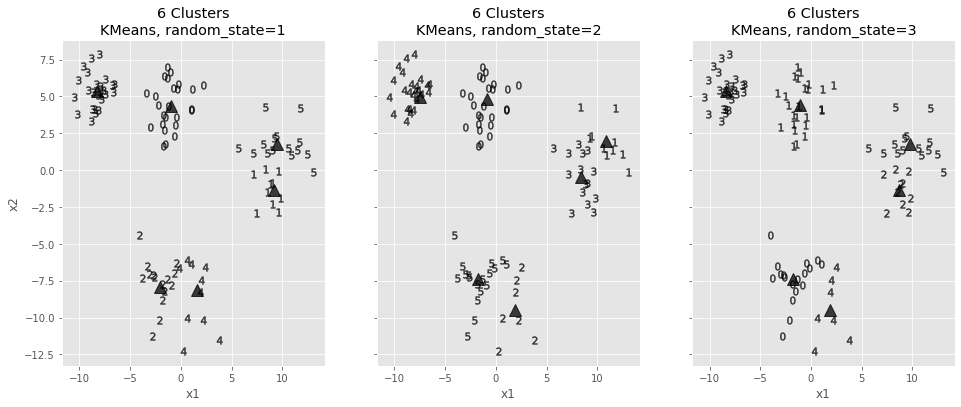

In [11]:
from sklearn.cluster import KMeans

random_state_options = [1, 2, 3]

fig, axs = plt.subplots(1, len(random_state_options), figsize=(16, 6), sharex=True, sharey=True)

for i, random_state in enumerate(random_state_options):
    
    x, y = df_blobs[['x1', 'x2']], df_blobs['y']
    kmeans = KMeans(init='random', max_iter=2, n_clusters=6, random_state=random_state)
    y_pred = kmeans.fit_predict(x)
    
    plot_2d_clusters(x, y_pred, axs[i])
    
    axs[i].plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'k^', ms=12, alpha=0.75)
    
    axs[i].set_title(f'{axs[i].get_title()}\nKMeans, random_state={random_state}')

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


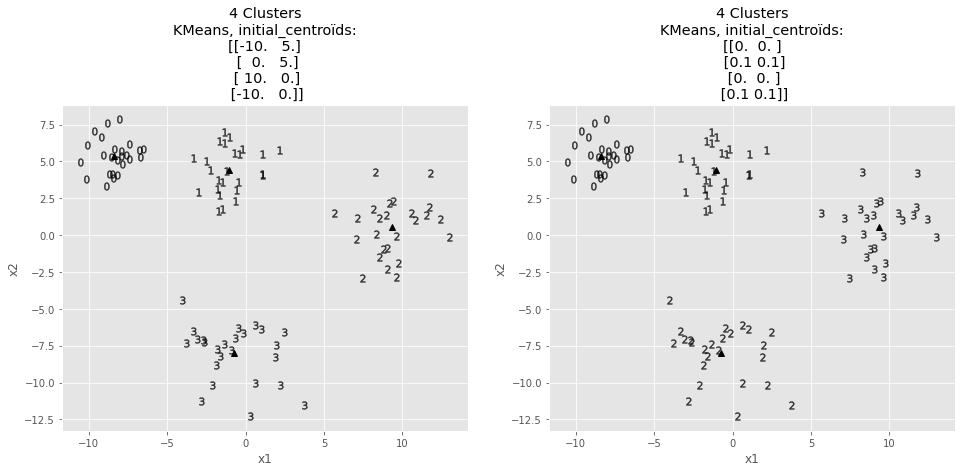

In [15]:
from sklearn.cluster import KMeans

initial_centroid_options = np.array([
 [(-10,5), (0, 5), (10, 0), (-10, 0)],
 [(0,0), (0.1, 0.1), (0, 0), (0.1, 0.1)],
])

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

for i, initial_centroids in enumerate(initial_centroid_options):
  x, y = df_blobs[['x1', 'x2']], df_blobs['y']
  kmeans = KMeans(
      init=initial_centroids, max_iter=500, n_clusters=4, random_state=7
 )
  y_pred = kmeans.fit_predict(x)
  plot_2d_clusters(x, y_pred, axs[i])
  axs[i].plot(
      kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'k^'
 )
  axs[i].set_title(f'{axs[i].get_title()}\nKMeans, initial_centroïds:\n{initial_centroid_options[i]}')

# Agglomerative Clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering

x, y = df_blobs[['x1', 'x2']], df_blobs['y']

# agglo = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
agglo = AgglomerativeClustering(n_clusters=4)
y_pred = agglo.fit_predict(x)



In [17]:
y_pred

array([1, 0, 3, 1, 3, 1, 0, 2, 3, 0, 0, 2, 0, 3, 1, 0, 0, 2, 0, 3, 1, 3,
       3, 0, 2, 3, 2, 2, 0, 1, 0, 0, 1, 0, 0, 3, 2, 3, 1, 3, 0, 1, 1, 2,
       1, 2, 3, 3, 2, 3, 2, 0, 2, 0, 1, 3, 1, 0, 1, 1, 1, 0, 1, 2, 3, 2,
       3, 2, 2, 1, 3, 2, 3, 3, 2, 2, 2, 2, 0, 1, 1, 1, 3, 0, 2, 0, 2, 3,
       3, 1, 0, 1, 3, 0, 2, 2, 0, 1, 3, 1])

In [18]:
agglo.n_leaves_

100

In [19]:
x.shape

(100, 2)

In [20]:
len(agglo.children_)

99

In [21]:
agglo.children_[-5:]

array([[182, 193],
       [188, 192],
       [189, 191],
       [194, 195],
       [196, 197]])

In [22]:
def get_children(node, n_samples):
    if node[0] >= n_samples:
        child_cluster_id = node[0] - n_samples
        left = get_children(
            agglo.children_[child_cluster_id], 
            n_samples
        )
    else:
        left = node[0]
        
    if node[1] >= n_samples:
        child_cluster_id = node[1] - n_samples
        right = get_children(
            agglo.children_[child_cluster_id], 
            n_samples
        )
    else:
        right = node[1]
    
    return [left, right]

root = agglo.children_[-1]
n_samples = df_blobs.shape[0]

tree = get_children(root, n_samples)

In [23]:
tree[0][0]

[[[46, [[25, 73], [21, 66]]], [87, 88]],
 [[[22, 64], [4, [49, 98]]],
  [[19, [55, 72]], [[37, 70], [[[47, 82], [13, [39, 92]]], [2, [8, 35]]]]]]]

In [24]:
def flatten(sub_tree, flat_list):
    if type(sub_tree) is not list:
        flat_list.append(sub_tree)
    else:
        r, l = sub_tree
        flatten(r, flat_list)
        flatten(l, flat_list)

flat_list = []
flatten(tree[0][0], flat_list)
flat_list

', '.join([f'{item}' for item in flat_list])

'46, 25, 73, 21, 66, 87, 88, 22, 64, 4, 49, 98, 19, 55, 72, 37, 70, 47, 82, 13, 39, 92, 2, 8, 35'

In [25]:
y_pred

array([1, 0, 3, 1, 3, 1, 0, 2, 3, 0, 0, 2, 0, 3, 1, 0, 0, 2, 0, 3, 1, 3,
       3, 0, 2, 3, 2, 2, 0, 1, 0, 0, 1, 0, 0, 3, 2, 3, 1, 3, 0, 1, 1, 2,
       1, 2, 3, 3, 2, 3, 2, 0, 2, 0, 1, 3, 1, 0, 1, 1, 1, 0, 1, 2, 3, 2,
       3, 2, 2, 1, 3, 2, 3, 3, 2, 2, 2, 2, 0, 1, 1, 1, 3, 0, 2, 0, 2, 3,
       3, 1, 0, 1, 3, 0, 2, 2, 0, 1, 3, 1])

In [26]:
n_samples = x.shape[0]

y_pred_dash = np.zeros(n_samples)

for i, j, label in [(0,0,0), (0,1,1), (1,0,2), (1,1,3)]:

    flat_list = []
    flatten(tree[i][j], flat_list)

    for sample_index in flat_list:
        y_pred_dash[sample_index] = label
    
y_pred_dash

array([1., 3., 0., 1., 0., 1., 3., 2., 0., 3., 3., 2., 3., 0., 1., 3., 3.,
       2., 3., 0., 1., 0., 0., 3., 2., 0., 2., 2., 3., 1., 3., 3., 1., 3.,
       3., 0., 2., 0., 1., 0., 3., 1., 1., 2., 1., 2., 0., 0., 2., 0., 2.,
       3., 2., 3., 1., 0., 1., 3., 1., 1., 1., 3., 1., 2., 0., 2., 0., 2.,
       2., 1., 0., 2., 0., 0., 2., 2., 2., 2., 3., 1., 1., 1., 0., 3., 2.,
       3., 2., 0., 0., 1., 3., 1., 0., 3., 2., 2., 3., 1., 0., 1.])

## The adjusted Rand index

## $$RI = \frac{(TP + TN)}{(TP + FP + TN + FN)}$$
It's like accuracy score in classification.

The Adjusted Rand index ignoring permutations and with chance normalization.Non-adjusted measures such as the V-Measure show a dependency between the number of clusters and the number of samples: the mean V-Measure of random labeling increases significantly as the number of clusters is closer to the total number of samples used to compute the measure.

Though the Rand Index may only yield a value between 0 and +1, the adjusted Rand index can yield negative values if the index is less than the expected index



In [27]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y_pred, y_pred_dash)

1.0